In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv('./IRIS.xls')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
dataset.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [5]:
dataset.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

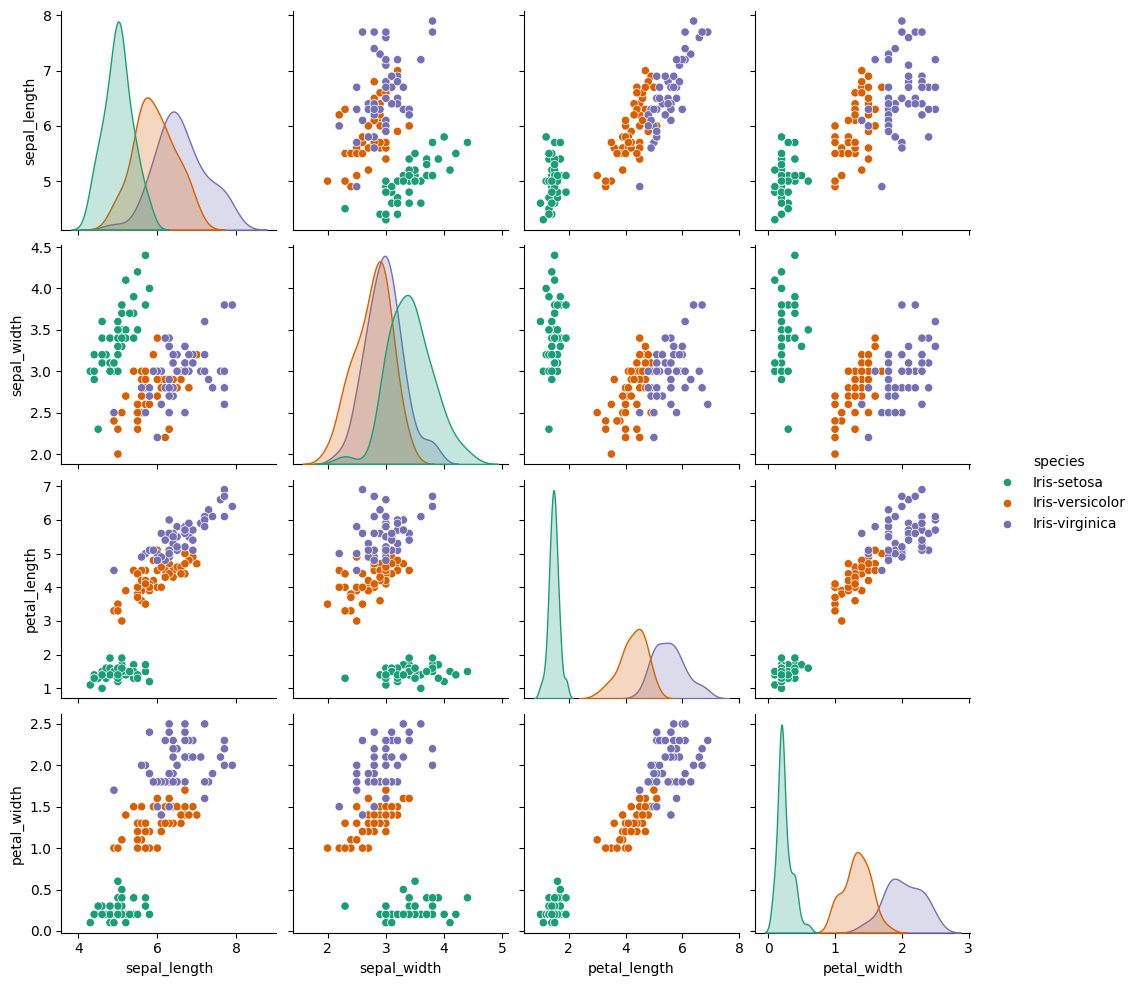

In [6]:
sns.pairplot(data=dataset, hue='species',palette='Dark2')

In [7]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
dataset['Species_encode']=en.fit_transform(dataset.species)
dataset.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species,Species_encode
110,6.5,3.2,5.1,2.0,Iris-virginica,2
142,5.8,2.7,5.1,1.9,Iris-virginica,2
78,6.0,2.9,4.5,1.5,Iris-versicolor,1
25,5.0,3.0,1.6,0.2,Iris-setosa,0
8,4.4,2.9,1.4,0.2,Iris-setosa,0
88,5.6,3.0,4.1,1.3,Iris-versicolor,1
10,5.4,3.7,1.5,0.2,Iris-setosa,0
93,5.0,2.3,3.3,1.0,Iris-versicolor,1
89,5.5,2.5,4.0,1.3,Iris-versicolor,1
3,4.6,3.1,1.5,0.2,Iris-setosa,0


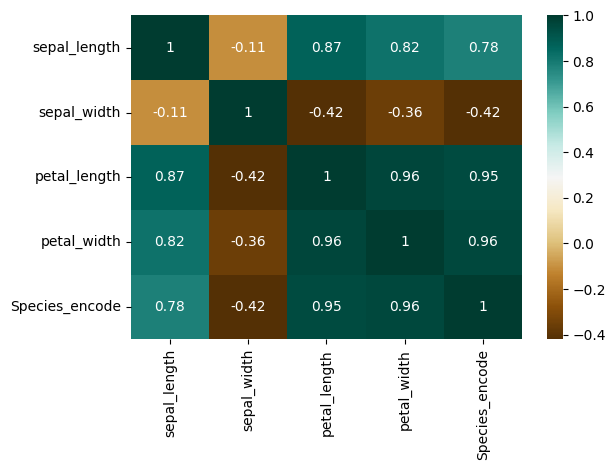

In [8]:
sns.heatmap(dataset.corr(numeric_only=True),annot=True,cmap='BrBG')
plt.tight_layout()
plt.show()

In [9]:
y=dataset.Species_encode
X=dataset.drop(['species','Species_encode'],axis=1)


In [10]:
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species_encode, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [13]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)
print('Mean Squared Error (Linear Regression - Train):',   mean_squared_error(y_train, lr_pred_train))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, lr_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,lr_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,lr_pred_test))


Mean Squared Error (Linear Regression - Test): 0.062210496067178996
Mean Absolute Error  (Linear Regression - Test):  0.20416492381445578
R2 score (Linear Regression - Train):  0.9357143366908295
R2 Score (Linear Regression - Test): 0.8845578423495647


In [14]:
randcl=RandomForestClassifier()
randcl.fit(X_train,y_train)
randcl_pred_train = randcl.predict(X_train)
randcl_pred_test = randcl.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy_Score:", accuracy_score(randcl_pred_test,y_test))

accuracy_Score: 0.9666666666666667


In [15]:
from sklearn.ensemble import RandomForestRegressor
randrg=RandomForestRegressor()
randrg.fit(X_train,y_train)
randrg_pred_train = randrg.predict(X_train)
randrg_pred_test = randrg.predict(X_test)
print('Mean Squared Error (Linear Regression - Train):',   mean_squared_error(y_train, randrg_pred_train))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, randrg_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,randrg_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,randrg_pred_test))


Mean Squared Error (Linear Regression - Test): 0.03345666666666667
Mean Absolute Error  (Linear Regression - Test):  0.035666666666666666
R2 score (Linear Regression - Train):  0.9918977352793156
R2 Score (Linear Regression - Test): 0.9379154639175258


In [21]:
declf=DecisionTreeClassifier()
declf.fit(X_train,y_train)
y_pred_train=declf.predict(X_train)
y_pred_test=declf.predict(X_test)
print("Accuracy Score:", accuracy_score(y_test,y_pred_test))


Accuracy Score: 0.9666666666666667
